#**Week 10 - Group Activity**



> _Do the following on the dataset:_

*  **Explain the dataset**
*  **Check the summary statistics and discuss the max, min, avg, median and percentiles**
*  **The manager wants to find out whether the same amount was spent for the three advertisements (TV, Radio, Newspaper). Comment on your findings.**

##**Explain the dataset**

######***Importing necessary libraries***

In [1]:
pip install scipy --upgrade

     |████████████████████████████████| 38.1 MB 1.1 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


######***Reading dataset Advertising.csv in to Python Environment using read_csv(). The first 5 observations are displayed.***

In [4]:
df=pd.read_csv('/content/gdrive/MyDrive/ICTAK/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.rename(columns={'Unnamed: 0': 'Sl. No:'}, inplace=True)
df.head()

,Sl. No:,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sl. No:    200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


######***Finding the no: of Observations***

In [7]:
df.shape

(200, 5)

######***Checking for null values***

In [8]:
df[df.isna().any(axis=1)]

,Sl. No:,TV,Radio,Newspaper,Sales


##**Insights:**


*   The dataset contains the details of -
      *   _The different types of advertising media used_
      *   _The amount spent for each advertising media_
      *   _The amount of Sales received_
*   **200 Observations** and **5 Features** are found.
*   **No Null** values are recorded.
*  The datatype for the features - 
      *   _TV, Radio, Newspaper, Sales - are given as float with 64-bits_
      *   _Unnamed: 0 ( renamed as Sl. No:) is given as Integers with 64-bits_
*   The feature, Unnamed: 0 is used for numbering each observations in the dataset.

######***Pair Plot for the features - TV, Radio, Newspaper along the X-axis and Sales along the Y-axis***

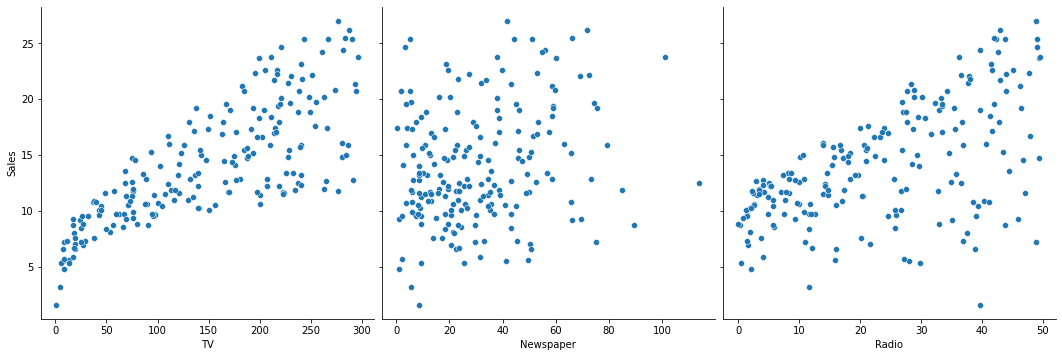

In [9]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=5, kind='scatter')
plt.show()

##**Insights:**
_As visible from the above plot,_


*   The values for the feature - TV are least scattered or in other words, advertising on TV did good for the Sales.
*   The values for the feature - Newspaper are widely scattered



##**Check the summary statistics and discuss the max, min, avg, median and percentiles**

In [10]:
df.describe()


,Sl. No:,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [11]:
df.agg([np.median])

,Sl. No:,TV,Radio,Newspaper,Sales
median,100.5,149.75,22.9,25.75,12.9


##**Insights:**
*   Max - The maximun amount spent was for advertising on TV (296.400000)
*   Min - The minimum amount spent was for advertising on Radio(0.000000	)
*   Median and Mean-
  *   Median and Mean for Newspaper are not almost same
  *   Median and Mean for TV, Radion and Sales are almost near to eachother.

##**The manager wants to find out whether the same amount was spent for the three advertisements (TV, Radio, Newspaper). Comment on your findings.**

***Define Hypothesis***
  
_If the same amount was spent for the three advertisements, definitely their mean will be same_


*   The Null Hypothesis, ***H(0) - The Means are equal***
*   The Alternative Hypothesis, ***H(a) - At least, one group mean is different from other groups***
*   Significance level = 5%
*   Here, we are doing **One-way ANOVA Test**




***Determining F-critical Value***

_To be able to determine F-critical value, we need:_

*   Significance level
*   df1 = k-1 (dfn — degrees of freedom nominator)
*   df2 = N-k (dfd — degrees of freedom denominator)

_where k = number of the groups, N = number of total observations._




In [15]:
from scipy.stats import f 
dfn = 2 #(3-1)
dfd = 597 #(3*200-3)
f_crit = f.ppf(1-0.05,dfn,dfd)
print('F-critical=',f_crit)

F-critical= 3.010815204196057


***Finding F-statistics and P-value***

In [13]:
fvalue, pvalue = stats.f_oneway(df['TV'], df['Radio'], df['Newspaper'])
print('F-Statistic=',fvalue,'\nP-value=',pvalue)
if(pvalue<=0.05):
    print("We reject null hypothesis")
else:
    print("We accept null hypothesis")

F-Statistic= 358.8514595342597 
P-value= 4.552931539744962e-103
We reject null hypothesis


##**Insights:**


*  _Since the **P-Value is smaller than the level of significance** , we reject our Null Hypothesis._
*   _Also, **the F-statistics is greater than the F-ciritical**, leads to the rejection of our Null Hypothesis._
*  _Thus, we conclude that - **At least, one group mean is different from other groups** OR **The amount spent for the three advertisement was different**_